Accuracy after feature engineering and selection: 0.93


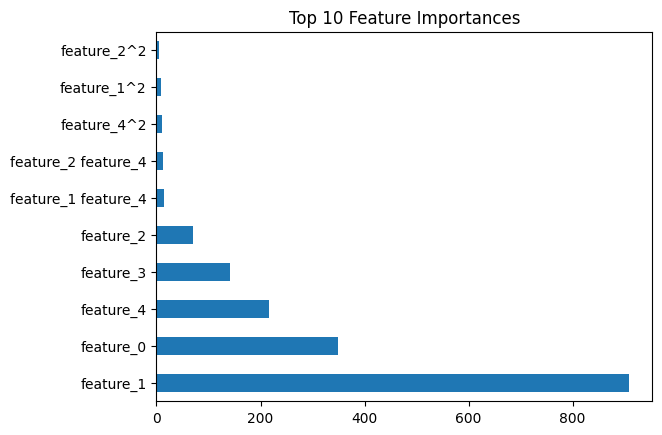

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif

# Generating a synthetic dataset
X, y = make_classification(n_samples=1000, 
                           n_features=5, n_informative=3, n_redundant=2, random_state=42)

# Converting to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Creating new polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df.drop('target', axis=1))
df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(df.columns[:-1]))
df_poly['target'] = df['target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_poly.drop('target', axis=1), df_poly['target'], test_size=0.3, random_state=42)

# Feature selection using ANOVA F-value between label and feature
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train_selected, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluating the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature engineering and selection: {accuracy:.2f}")

# Visualizing the feature importances
feature_importances = pd.Series(selector.scores_, 
                                index=df_poly.drop('target', axis=1).columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()
